In [24]:

import numpy as np
#!pip install scipy
from scipy import misc
i = misc.ascent()

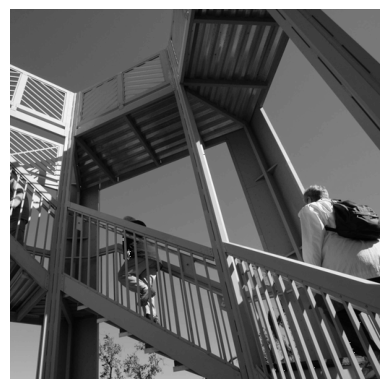

In [25]:
#!pip install mathplotlib
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [26]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [27]:
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ]
#filter = [[1, 1, 1], [1, 2, 1], [1, 1, 1]]

#filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1

In [30]:
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y - 1] * filter[0][0])
        convolution = convolution + (i[x, y - 1] * filter[0][1])
        convolution = convolution + (i[x + 1, y - 1] * filter[0][2])
        convolution = convolution + (i[x - 1, y] * filter[1][0])        
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x + 1, y] * filter[1][2])
        convolution = convolution + (i[x - 1, y + 1] * filter[2][0])
        convolution = convolution + (i[x, y + 1] + filter[2][1])
        convolution = convolution + (i[x + 1, y + 1] * filter[2][2])
        convolution = convolution + weight
        if(convolution<0):
            convolution = 0
        if convolution>255:
            convolution = 255
        i_transformed[x, y] = convolution

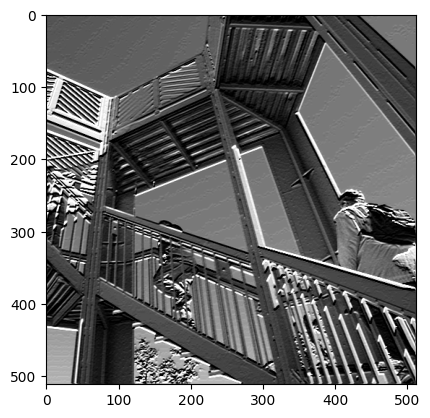

In [31]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

In [32]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x + 1, y])
        pixels.append(i_transformed[x, y + 1])
        pixels.append(i_transformed[x + 1, y + 1])
        pixels.sort(reverse=True)
        newImage[int(x/2), int(y/2)] = pixels[0]

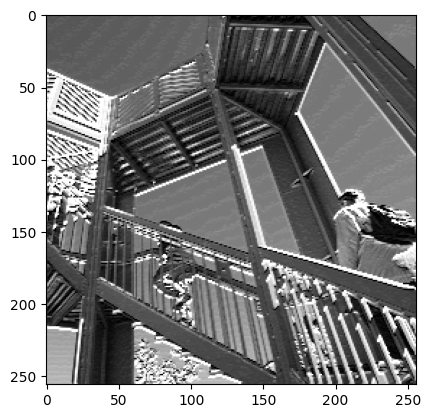

In [33]:
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()